# Study the Hubbard atom using python

In [5]:
import numpy as np
from scipy import linalg as lin
from matplotlib import pyplot as plt

First, write a function that returns the Hamiltonian as a matrix in the basis |0>, |up>, |down>, |up down>. In our case, this is the eigenbasis of the Hamiltonian, and so the Hamiltonian matrix will be diagonal. This is not generically the case. 

In [6]:
def get_hamiltonian_matrix(mu, U): 
    hamiltonian_matrix = np.zeros((4,4))
    hamiltonian_matrix[0,0] = 0.
    hamiltonian_matrix[1,1] = -mu
    hamiltonian_matrix[2,2] = -mu
    hamiltonian_matrix[3,3] = -2*mu + U
    # Alternatively, use the one-liner: hamiltonian_matrix = np.diag([0., -mu, -mu, -2*mu+U])      # <<<<<< numpy's diag will build a diagonal matrix with the input list as the diagonal
    
    return hamiltonian_matrix

Next, write a function that returns the partition function given a hamiltonian matrix and an inverse temperature beta.

In [7]:
def get_partition_function(hamiltonian_matrix, beta):
    eigenvalues, eigenvectors = lin.eigh(hamiltonian_matrix)
    
    partition_function = 0
    for ev in eigenvalues:
        partition_function += np.exp(-beta*ev)    
    # Alternatively, you may use use one of these: 
    # * partition_function = np.sum(np.exp(-beta*eigenvalues))                      # <<<<< bulit-in function np.sum is faster than using a for loop!
    # * partition_function = np.trace(lin.expm(-beta*hamiltonian_matrix))           # <<<<< scipy.linalg's expm() performs a matrix exponential
    
    return partition_function
    

Next, write a function that takes an operator, a hamiltonian, and an inverse temperature and returns an expectation value

In [8]:
def get_expectation_value(operator, hamiltonian_matrix, beta):
    
    Z = get_partition_function(hamiltonian_matrix, beta)
    expectation_value = np.trace(lin.expm(-beta*hamiltonian_matrix)@operator)/Z      #  <<<<<<<< @ performs matrix multiplication
    
    return expectation_value

For part b), write the total number operator in the same basis as the Hamiltonian => diagonal matrix with the entries 0, 1, 1, and 2

In [9]:
total_number_operator = np.diag([0,1,1,2])

U=4
beta=1/2
mu=1

H = get_hamiltonian_matrix(mu, U)
print(H) # compare with pen and paper result to test code!

Z = get_partition_function(H, beta)
print(Z) # compare with pen and paper result to test code!

n_tot = get_expectation_value(total_number_operator, H, beta)
print(n_tot) # compare with pen and paper result to test code!

[[ 0.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  2.]]
4.665321982571699
0.8645065525616499


Calculate the expectation value for a range of values of the chemical potential and then plot the total filling vs mu. 

Text(0.5, 1.0, 'U=4.0, beta=1/2')

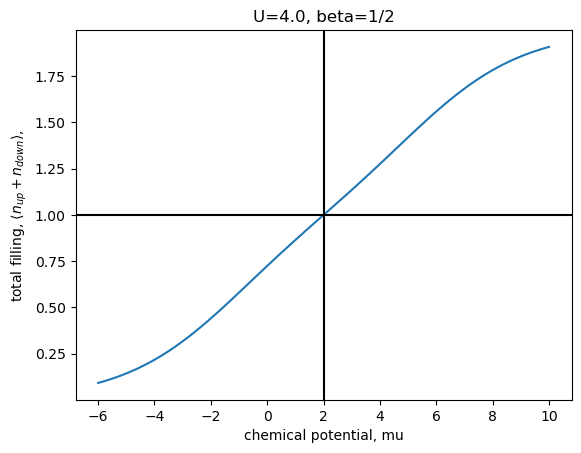

In [10]:
mus = np.linspace(-3/2*U, 5/2*U, 100)
n_tots = []

for mu in mus:
    H = get_hamiltonian_matrix(mu, U)
    n_tot = get_expectation_value(total_number_operator, H, beta)
    n_tots.append(n_tot)
    
plt.plot(mus, n_tots)
plt.axvline(U/2, color='k')
plt.axhline(1, color='k')
plt.xlabel('chemical potential, mu')
plt.ylabel('total filling, $\\langle n_{up} + n_{down}\\rangle$,')
plt.title('U=4.0, beta=1/2')

For part c), write the squared magnetization operator in the same basis as the Hamiltonian => diagonal matrix with the entries 0, 1, 1, 0

Text(0.5, 1.0, 'U=4.0, mu=U/2 (half-filling)')

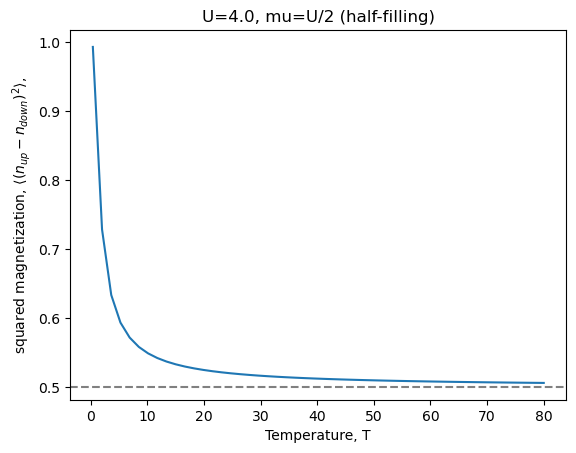

In [11]:
m_sq_operator = np.diag([0,1,1,0])

U=4.0
mu=U/2 # half-filling

Ts = np.linspace(0.1*U, 20*U)
betas = 1/Ts
m_sqs = []

for beta in betas:
    H = get_hamiltonian_matrix(mu, U)
    m_sq = get_expectation_value(m_sq_operator, H, beta)
    m_sqs.append(m_sq)
    
plt.plot(Ts, m_sqs)
plt.xlabel('Temperature, T')
plt.ylabel('squared magnetization, $\\langle(n_{up} - n_{down})^2\\rangle$,')
plt.axhline(0.5, color = 'gray', linestyle='dashed')
plt.title('U=4.0, mu=U/2 (half-filling)')